In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

names = ["data/steam_reviews.csv",
         "data/steam_reviews_bonus_1.csv",
         "data/steam_reviews_bonus_2.csv"]

import random
p=0.001
data = pd.read_csv(names[0], header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [65]:
#Let's first have a look at what kind of data we are dealing with
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9891 entries, 0 to 9890
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ...1                            9891 non-null   int64  
 1   app_id                          9891 non-null   int64  
 2   app_name                        9891 non-null   object 
 3   review_id                       9891 non-null   int64  
 4   language                        9891 non-null   object 
 5   review                          9875 non-null   object 
 6   timestamp_created               9891 non-null   float64
 7   timestamp_updated               9891 non-null   float64
 8   recommended                     9891 non-null   bool   
 9   votes_helpful                   9891 non-null   int64  
 10  votes_funny                     9891 non-null   int64  
 11  weighted_vote_score             9891 non-null   float64
 12  comment_count                   98

,...1,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,519,292030,The Witcher 3: Wild Hunt,85082431,english,*Uses Axii* buy the game \r\n\r\nIve played 23...,1.564770e+09,1.572281e+09,True,0,...,False,False,False,7.656120e+16,95,7,1593,1532,1312.0,1.562197e+09
1,1936,292030,The Witcher 3: Wild Hunt,84812383,swedish,GOdd\r\n,1.086902e+09,1.086902e+09,True,0,...,False,False,False,7.656120e+16,6,1,1307,955,1083.0,1.072086e+09
2,4489,292030,The Witcher 3: Wild Hunt,84395460,brazilian,"Jogabilidade boa, Gr�ficos bom, Dublagem boa, ...",1.441109e+09,1.441109e+09,True,0,...,True,False,False,7.656120e+16,6,1,2417,108,2417.0,1.434368e+09
3,4999,292030,The Witcher 3: Wild Hunt,84323221,brazilian,ta bom\r\n,1.260621e+09,1.260621e+09,True,2,...,False,False,False,7.656120e+16,218,1,844,0,844.0,1.249083e+09
4,6356,292030,The Witcher 3: Wild Hunt,84127999,schinese,"<U+5DEB><U+5E08>3,<U+5F3A>",1.304713e+09,1.304713e+09,True,1,...,True,False,False,7.656120e+16,496,13,3247,2063,895.0,1.298850e+09


In [66]:
#And let's see if we have any duplicated row
index=0
for i in data.duplicated():
    if i==True: print(index, "is duplicated")
    index+=1

In [67]:
#this is just to have an idea of how big every column of our dataset is
data.memory_usage( )

Index                               128
...1                              79128
app_id                            79128
app_name                          79128
review_id                         79128
language                          79128
review                            79128
timestamp_created                 79128
timestamp_updated                 79128
recommended                        9891
votes_helpful                     79128
votes_funny                       79128
weighted_vote_score               79128
comment_count                     79128
steam_purchase                     9891
received_for_free                  9891
written_during_early_access        9891
author.steamid                    79128
author.num_games_owned            79128
author.num_reviews                79128
author.playtime_forever           79128
author.playtime_last_two_weeks    79128
author.playtime_at_review         79128
author.last_played                79128
dtype: int64

In [68]:
#the following command allows us to check wheter there are 
#null values or not (and in case fix those)
data.isnull().sum()

...1                               0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            16
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         12
author.last_played                 0
dtype: int64

<AxesSubplot:>

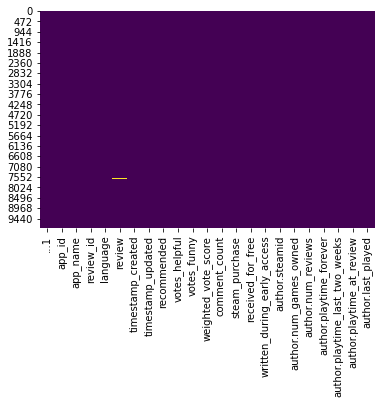

In [69]:
#let's visually see how many null values are there
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

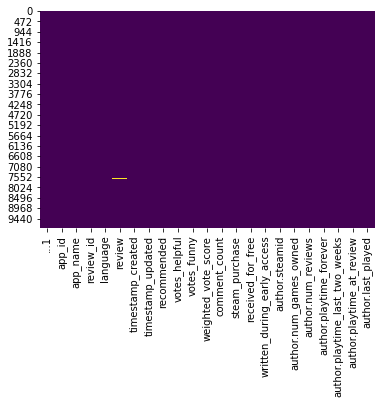

In [70]:
#Replace null values with mean of the column
data["author.playtime_at_review"]=pd.to_numeric(data["author.playtime_at_review"])
data["author.playtime_at_review"].fillna(data["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

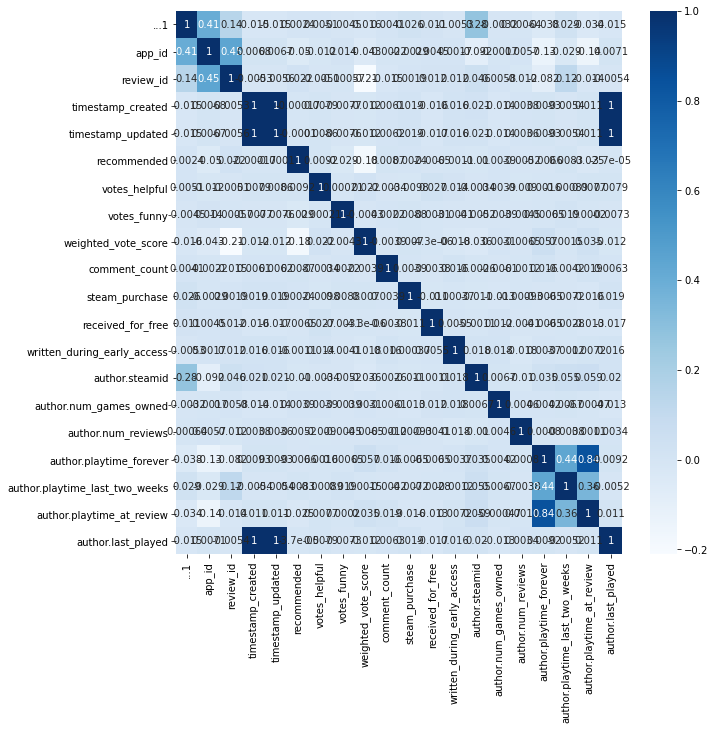

In [71]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

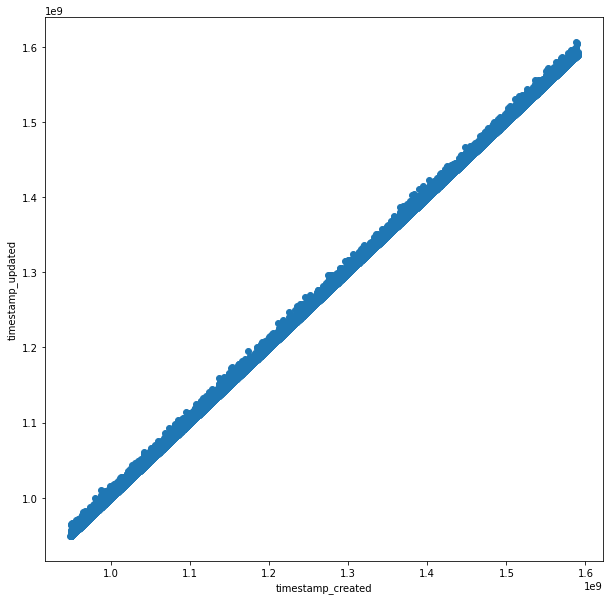

In [72]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=data)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

## Plot the number of reviews for each application in descending order

In [73]:
#Here we just handle the data in order to plot it in the following xell
s=data["app_name"].value_counts()
percent=1/100*data.shape[0]
s=s.groupby(np.where(s>=percent,s.index,'other games')).sum()
s=s.sort_values(axis=0, ascending=False, ignore_index=False)

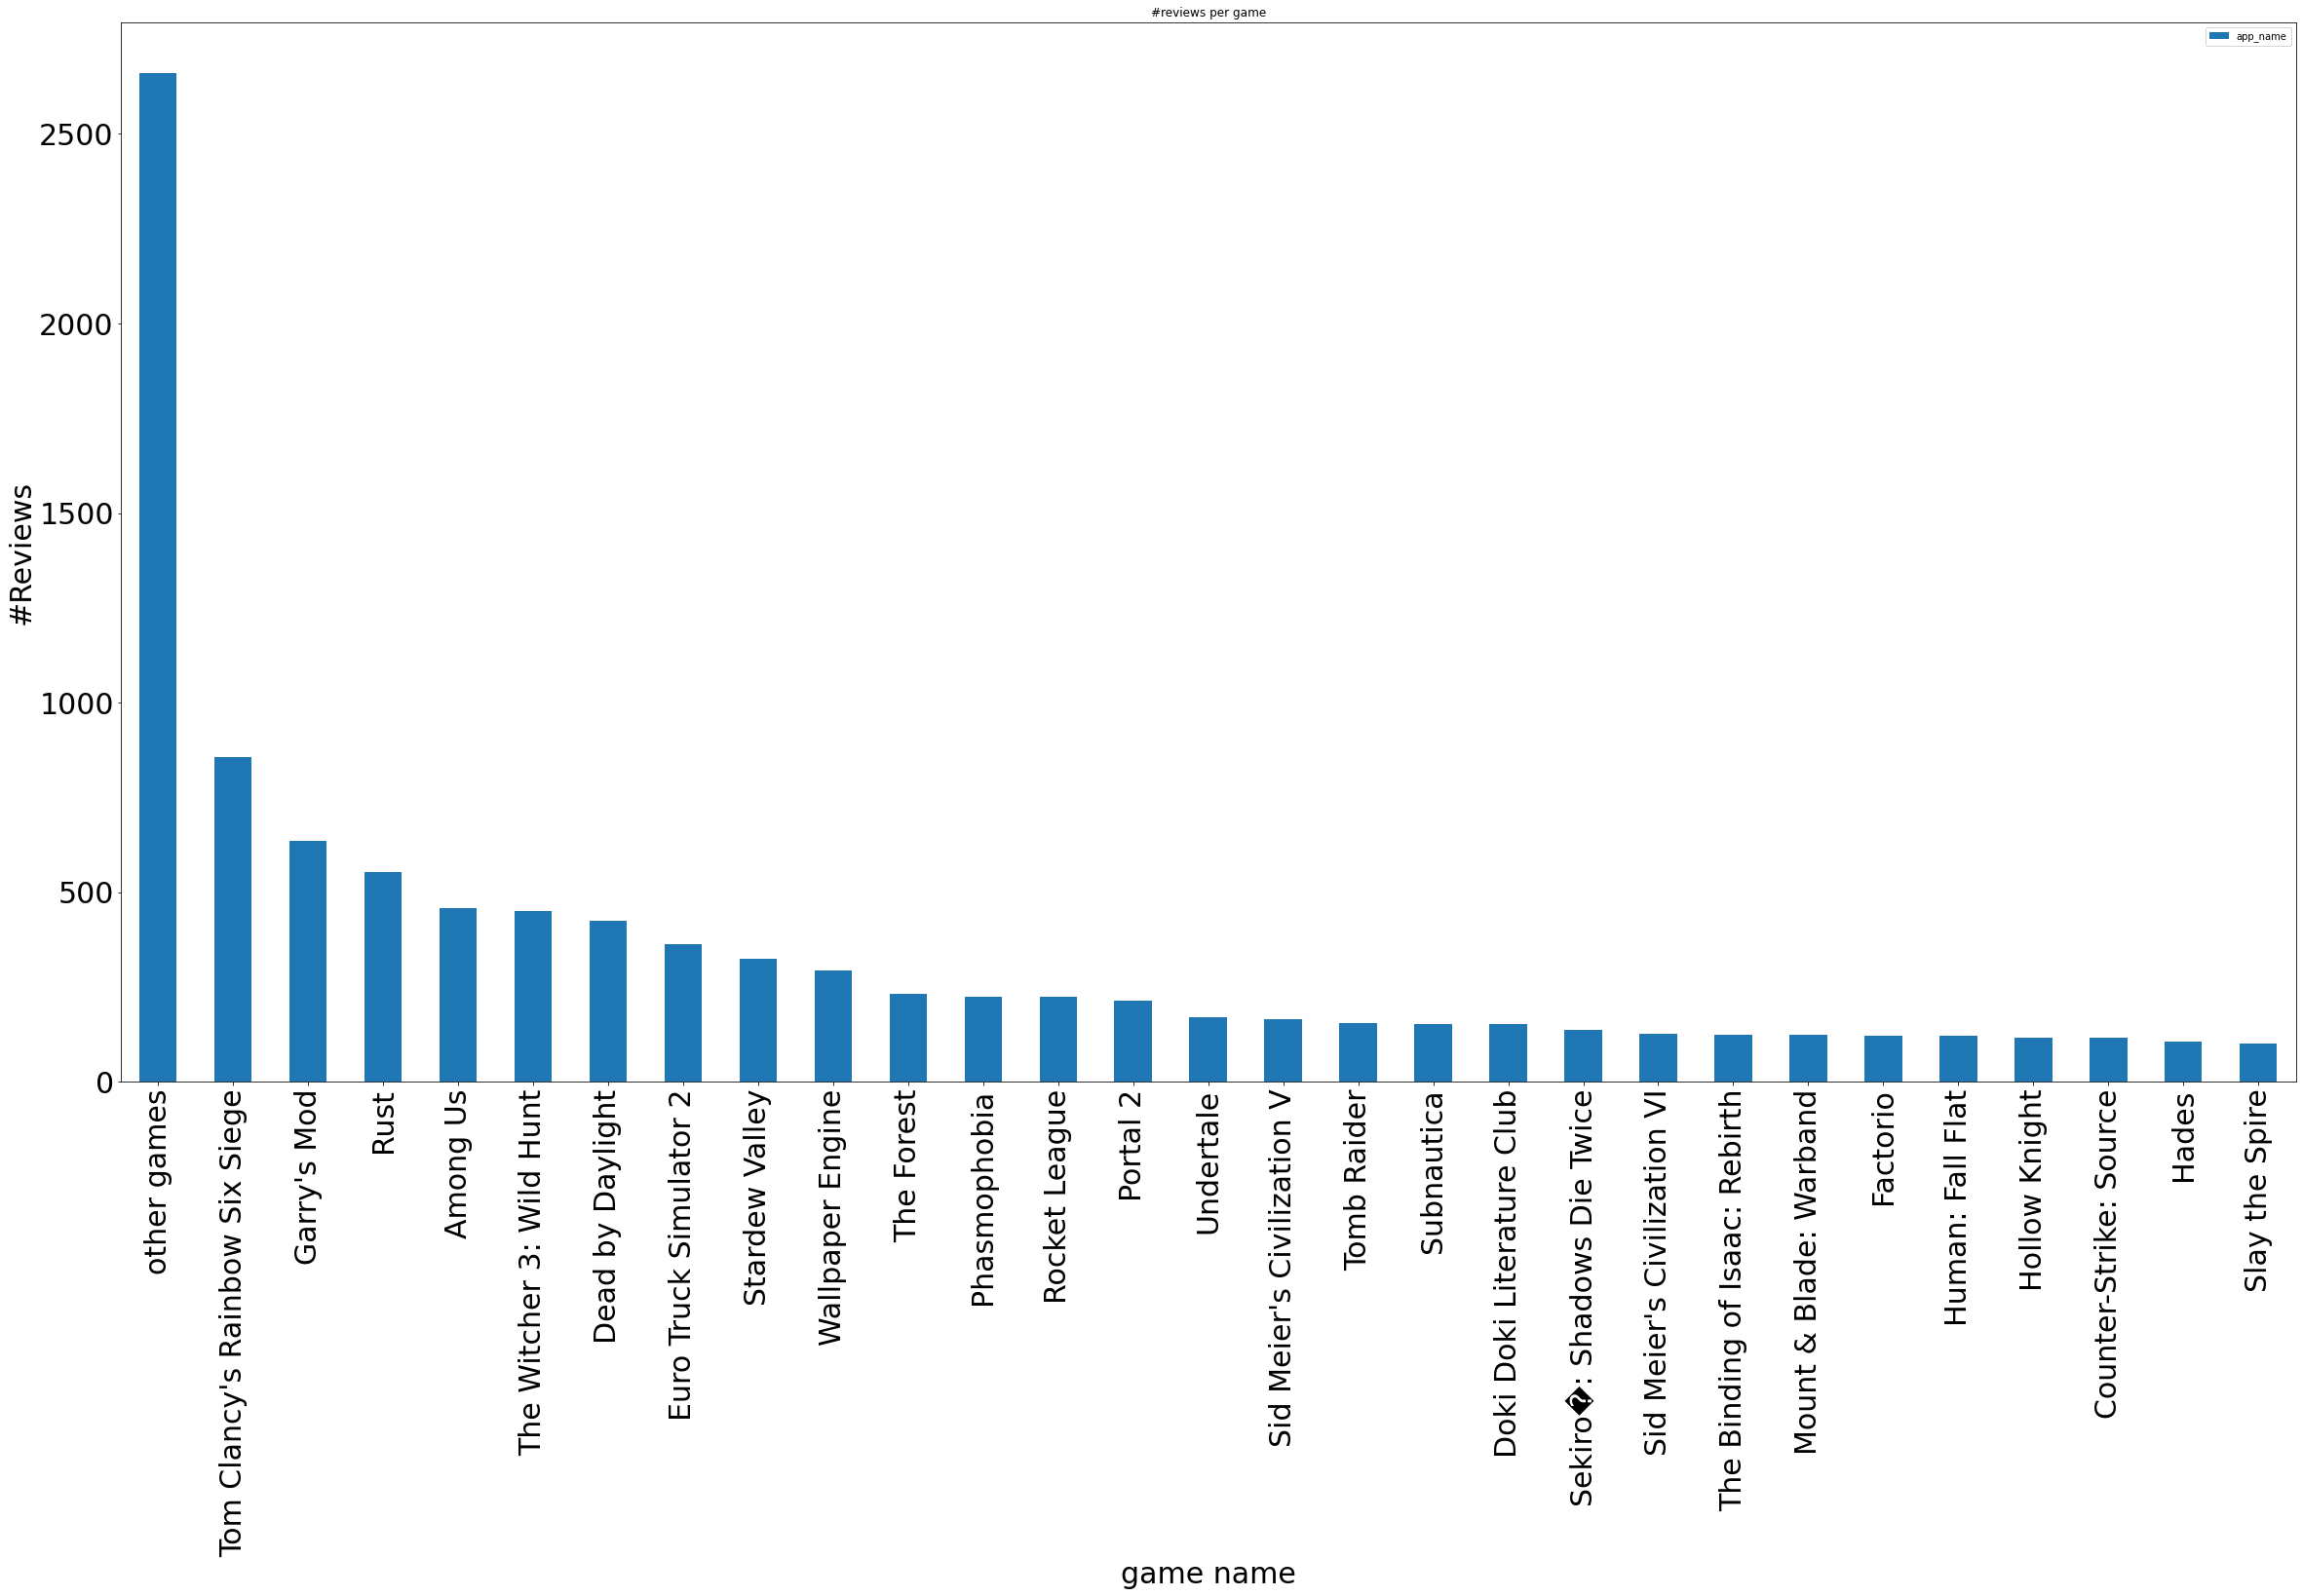

In [74]:
#We opted for grouping all the games with a low number of reviews into a single column
ax=s.plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=30)
ax.set_xlabel("game name", fontsize=30)
ax.set_ylabel("#Reviews", fontsize=30)
plt.show()

## What applications have the best Weighted Vote Score?

In [75]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [76]:
#Here we just pick the 10 games with the highest absolute score
data[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
5047,Sekiro�: Shadows Die Twice,0.963381
4984,Sekiro�: Shadows Die Twice,0.947180
7166,DRAGON BALL FighterZ,0.943973
7932,HITMAN� 2,0.930810
4752,Kenshi,0.918751
4890,Borderlands 3,0.917065
4192,Euro Truck Simulator 2,0.911750
2327,Subnautica,0.909751
1909,Dead by Daylight,0.909241
4302,Euro Truck Simulator 2,0.902791


In [77]:
#MEAN METHOD 
app_vote_mean = data[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Pogostuck: Rage With Your Friends,0.707965
Identity,0.523955
Takedown: Red Sabre,0.511743
Umbrella Corps,0.497492
X Rebirth,0.480164
Slipstream,0.476992
Cave Story+,0.454321
"Warhammer 40,000: Dawn of War III",0.387987
RollerCoaster Tycoon World,0.380613


## Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [78]:
#the 2 questions are done together
rec=data.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [79]:
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,5,5,0
<U+4E09><U+56FD><U+7FA4><U+82F1><U+4F20>8 Heroes of the Three Kingdoms 8,5,10,0
A Hat in Time,26,20,1
A Short Hike,9,8,2
A Way Out,11,10,2
...,...,...,...
"Warhammer 40,000: Dawn of War III",6,11,1
Warhammer: Vermintide 2,55,47,2
Wolfenstein: Youngblood,3,10,0


<AxesSubplot:xlabel='app_name'>

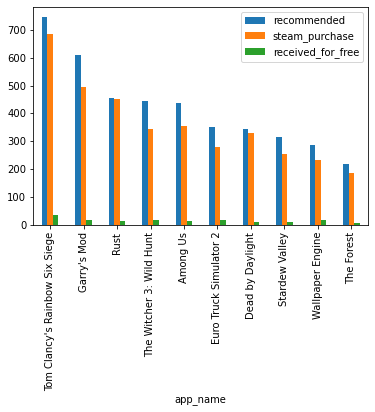

In [80]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

<AxesSubplot:xlabel='app_name'>

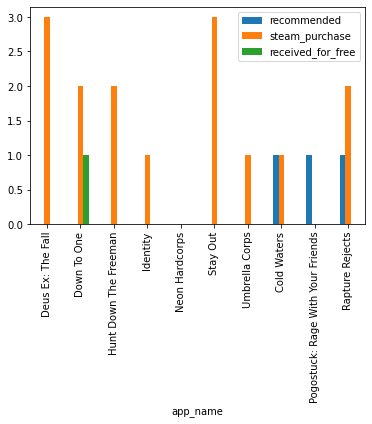

In [81]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')

# RQ3 

## What is the most common time the authors review an application?

In [19]:
from datetime import datetime as dt    #useful to work with timestamp
from matplotlib import pyplot as plt   #useful to plot result
from collections import Counter        #useful to count occurances

col = ["timestamp_created"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

#convert all timestamp datas in dates and get only time
timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]
t = [dt.fromtimestamp(x).time() for x in timestamp]
#count occurances
most_common_time = Counter(t).most_common(1)[0]

print("\nThe most common time of reviews is:", most_common_time[0],"with", most_common_time[1], "occurances.\n")


The most common time of reviews is: 16:54:53 with 807 occurances.



In [20]:
def reviewPerIntervals(interval): #plot the number of reviews for each of the intervals in times
    #get hour from our time_datas
    h = [x.hour for x in t]
    #create the intervals of time
    trange = [dt.strptime(x[:][0],"%H:%M:%S").hour for x in intervals]
    #add the las interval of time manually otherwise we miss to count the review between 20-24
    trange.append(24)
    trange = sorted(trange)
    #create the bin to count and plot the occurances in each interval
    count = pd.cut(h, trange)
    #plot the result
    count.value_counts().plot(kind='bar',rot = 0, color = "b" )
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')

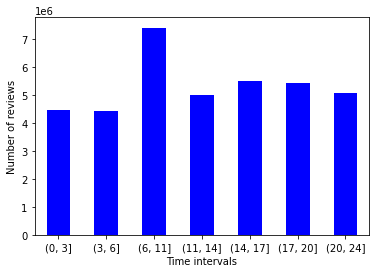

In [21]:
#plot the number of reviews in each given interval
intervals = [["06:00:00","10:59:59"],
             ["11:00:00","13:59:59"],
             ["14:00:00","16:59:59"],
             ["17:00:00","19:59:59"],
             ["20:00:00","23:59:59"],
             ["00:00:00","02:59:59"],
             ["03:00:00","05:59:59"]]

reviewPerIntervals(intervals)

In [22]:
del t
del timestamp

# RQ4

## What are the top 3 languages used to review applications?

In [23]:
col =  ["language","votes_helpful","votes_funny"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

languages = data.language
#get the 3 most used languages
most_common_len = Counter(languages).most_common(3)

print("\nThe most common languages used to review applications are:\n",
     "-",most_common_len[0][0],"with", most_common_len[0][1], "occurances\n",
     "-",most_common_len[1][0],"with", most_common_len[1][1], "occurances\n",
     "-",most_common_len[2][0],"with", most_common_len[2][1], "occurances\n",)


The most common languages used to review applications are:
 - english with 17024059 occurances
 - schinese with 6839502 occurances
 - russian with 4168323 occurances



In [24]:
def languageFilter(data, languages):
    return data[data.language.isin(languages)]

## How many of them were voted as funny?

In [25]:
top3 = [most_common_len[0][0],most_common_len[1][0],most_common_len[2][0]]

#filtering data in order to get reviews in specific languages
top3df = languageFilter(data, top3)
#get the percentage of funny reviews
perc_f = len(top3df[top3df.votes_funny > 0])/len(top3df)

print("\nThe", round(perc_f*100,2),"% of the reviews were voted as funny.")


The 11.81 % of the reviews were voted as funny.


## How many of them were voted as helpful?


In [26]:
#get the percentage of helpful reviews
perc_h = len(top3df[top3df.votes_helpful > 0])/len(top3df)

print("\nThe", round(perc_h*100,2),"% of the reviews were voted as helpful.")


The 28.13 % of the reviews were voted as helpful.


In [27]:
del top3df
del languages

# RQ5


## Top 10 most popular rewievers based on the number of reviews made

In [29]:
data = pd.read_csv(names[0], header=0, skiprows=lambda i: i>0 and random.random() > p)
top10 = data.sort_values(by = "author.num_reviews", ascending = False)

In [30]:
top10[["author.steamid", "author.num_reviews"]].drop_duplicates()[:10]

,author.steamid,author.num_reviews
15614,76561198062813911,1621
19915,76561198027973295,1378
10457,76561198027973295,1373
19645,76561198381331097,1124
18980,76561198052007123,1067
10518,76561198032476027,843
9165,76561198160346666,602
11041,76561198036328736,575
671,76561197984723321,564
2639,76561197969062133,499


## Application reviewed by the most popular author:

In [31]:
#looking for the most popular author based on the number of reviews done
most_popular = data[data["author.num_reviews"] == data["author.num_reviews"].max()]
#memorizing the steamid of the most popular author
author_id = int(most_popular["author.steamid"])

games = data[data["author.steamid"] == author_id]
games

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
15614,15600710,582010,Monster Hunter: World,50723872,english,"[h1] DISCLAIMER: This is a full review, and NO...",1558284547,1558284547,True,0,...,True,False,False,76561198062813911,1584,1621,1835.0,0.0,1835.0,1.558284e+09


## Applications purchased and got for free by the most popular author

In [32]:
purch = data[data["author.steamid"] == author_id]
count_purchase = 0
count_free = 0
total = 0

#iterate the purch DataFrame created to check if the games where purchased or not
for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        count_purchase += 1
    if(row["received_for_free"]):
        count_free += 1
    total += 1

#using the total number of games, i will calculate the percentage for the values
perc_purch = (count_purchase/total)*100
perc_free = (count_free/total)*100

print("The number of games PURCHASED by the most popular author is:\t", str(count_purchase),"[in percentage:", round(perc_purch, 2),"%]"
      "\nInstead, the number of games he RECEIVED FOR FREE is:\t\t", str(count_free), "[in percentage:", round(perc_free, 2),"%]")

The number of games PURCHASED by the most popular author is:	 1 [in percentage: 100.0 %]
Instead, the number of games he RECEIVED FOR FREE is:		 0 [in percentage: 0.0 %]


## Number of positive and negatives reviews for both games purchased and got for free

In [33]:
#using the iterator as in the last cell, we will check and count every review and store the results in different variables
p_purch = 0
n_purch = 0
tot_purch = 0

p_free = 0
n_free = 0
tot_free = 0

for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        if(row["recommended"]): p_purch += 1
        else: n_purch += 1
        tot_purch += 1
    if(row["received_for_free"]):
        if(row["recommended"]): p_free += 1
        else: n_free += 1
        tot_free += 1

if tot_purch == 0: tot_purch = 0
perc_purch_p = (p_purch/tot_purch)*100
perc_purch_n = (n_purch/tot_purch)*100

if tot_free == 0: tot_free = 1
perc_free_p = (p_free/tot_free)*100
perc_free_n = (n_free/tot_free)*100

print("PURCHASED:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_purch), "[in percentage:", round(perc_purch_p, 2) ,"%]"
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_purch), "[in percentage:", round(perc_purch_n, 2) ,"%]")
print("\nRECEIVED FOR FREE:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_free), "[in percentage:", round(perc_free_p, 2) ,"%]",
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_free), "[in percentage:", round(perc_free_n, 2) ,"%]")

PURCHASED: 
	The number of POSITIVE (recommended) games is:		 1 [in percentage: 100.0 %]
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]

RECEIVED FOR FREE: 
	The number of POSITIVE (recommended) games is:		 0 [in percentage: 0.0 %] 
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]


# RQ6

## Average time a user lets pass before updating a review

In [34]:
from datetime import datetime as dt
import time

created_timestamp = [x for x in data.timestamp_created if not pd.isnull(x)]

updated_timestamp = [x for x in data.timestamp_updated if not pd.isnull(x)]

In [35]:
comb = zip(created_timestamp, updated_timestamp)
diff = []

for c, u in comb:
    if (c != u):
        diff.append(u-c)

In [36]:
mean = 0
for i in diff:
    mean += i
mean = mean//len(diff)
day = mean // (24 * 3600)
mean = mean % (24 * 3600)
hour = mean // 3600
mean %= 3600
minute = mean // 60
minute += hour*60

print("The average time a user lets pass before updating a review is:", day, "days and", minute, "minutes")

The average time a user lets pass before updating a review is: 312 days and 25 minutes


The average time a user lets pass before updating a review is: 321 days and 46 minutes


## Top 3 authors that usually update their reviews

In [37]:
up = data[data["timestamp_created"] != data["timestamp_updated"]]

In [38]:
#The authors with most updated reviews, and the number of times they updated a review
out = up["author.steamid"].value_counts()[0:3]
out

76561198168862720    1
76561198843271820    1
76561198014229134    1
Name: author.steamid, dtype: int64

Text(0, 0.5, '# of updated reviews')

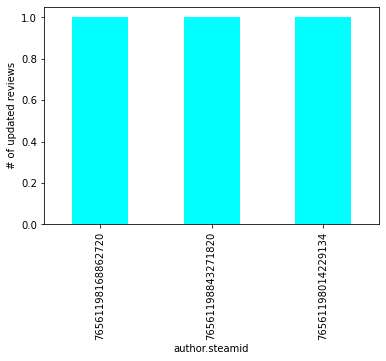

In [39]:
#plot the result
out.plot.bar(color = "cyan")
plt.xlabel("author.steamid")
plt.ylabel("# of updated reviews")

# RQ7

## What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

To calculate the probability that a review has a weighted vote score greater than or equal to 0.5, we will use the classic definition of probability, favorable cases over possible cases.

In [40]:
col = ["weighted_vote_score","votes_funny"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

prob = len(data[data.weighted_vote_score >= 0.5]) / len(data.weighted_vote_score)
print("\nThe probability is equal to:", round(prob,3))


The probability is equal to: 0.218


## What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

To calculate the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5, we will use the definition of Conditional probability:

$$\mathbb{P}(A|B)=\frac{\mathbb{P}(A\cap B)}{\mathbb{P}(B)}$$

$A$ = "the review has at least one vote as funny" 


$B$ = "the Weighted Vote Score is bigger than 0.5"

In [41]:
pB = len(data[data.weighted_vote_score > 0.5]) / len(data.weighted_vote_score)
B = data[data.weighted_vote_score > 0.5]
pAB = len(B[B.votes_funny > 0]) / len(data)

print("\nThe probability is equal to:", round(pAB/pB,3))


The probability is equal to: 0.191


## Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

To say if the two probabilities are independent we will use the definition:

$$\mathbb{P}(A\cap B)=\mathbb{P}(A)\mathbb{P}(B)$$

So if this definition is true we can say that the event “a review has at least one vote as funny” and the event “a review has a Weighted Vote Score equal or bigger than 0.5” are indipendent, otherwise they are dipendent.

In [42]:
pA = len(data[data.votes_funny > 0]) / len(data.weighted_vote_score)

if pA*pB == pAB:
    print("\nThe events are indipendent!")
else:
    print("\nThe events are dipendent!")


The events are dipendent!


In [43]:
del B

# RQ8


## Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian?

In [44]:
from scipy import stats
import numpy as np

col = ["weighted_vote_score","language","timestamp_created","timestamp_updated"]
data = pd.concat([pd.read_csv(name, usecols = col) for name in names],ignore_index = True)

#filtering the dataset
Russia = data[data['language']=='russian'].weighted_vote_score
China = data[data['language']=='schinese'].weighted_vote_score

#let's have a first look at mean and variance
print("\nThe Russian mean is :",round(np.mean(Russia),3))
print("The Chinese mean is :",round(np.mean(China),3))
print("\nThe Russian variance is :",round(np.var(Russia),3))
print("The Chinese variance is :",round(np.var(China),3))


The Russian mean is : 0.212
The Chinese mean is : 0.141

The Russian variance is : 0.066
The Chinese variance is : 0.056


Now that we’ve taken a first look at the mean and the variance of the two populations, we can run a t-test to determine if the two sets are significantly different from each other.

In [45]:
#t-test
ttest = stats.ttest_ind(Russia, China, equal_var=False)
print("\nThe p-valuee of the t-test is:",ttest.pvalue)


The p-valuee of the t-test is: 0.0


As you might expect the p-value of the t-test is very low so the difference in the group is remarkable so the two populations are different.

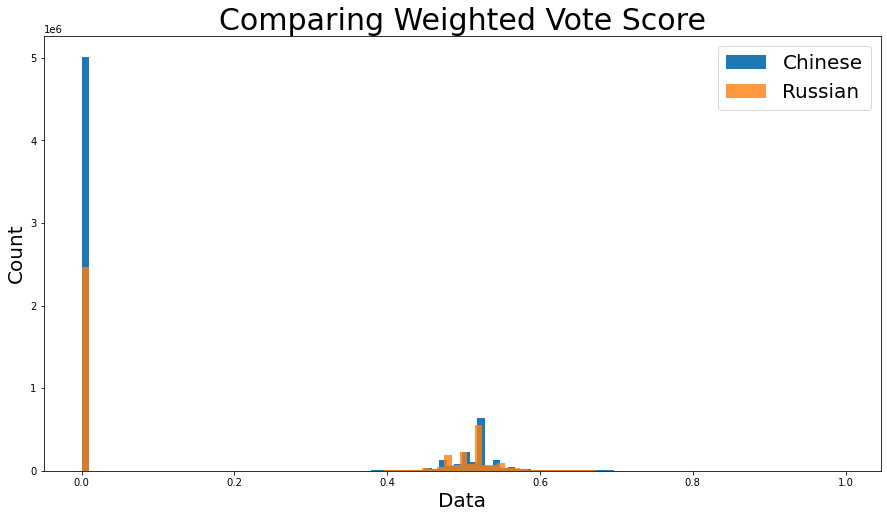

In [46]:
#a look of the distribution of the votes for each istance
plt.figure(figsize=(15,8))
plt.hist(China, bins=100, alpha=1, label="Chinese")
plt.hist(Russia, bins=100, alpha=0.8, label="Russian")

plt.xlabel("Data", size=20)
plt.ylabel("Count", size=20)
plt.title("Comparing Weighted Vote Score", size=30)
plt.legend(loc='upper right',fontsize = 20)
plt.show()

## Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

In [48]:
data = pd.read_csv(names[0], header=0, skiprows=lambda i: i>0 and random.random() > p)

#as before, reduce our dataset with just the entries we need
tab=data.loc[:,["timestamp_created","timestamp_updated","weighted_vote_score","recommended"]]  #last column is needed for the next question
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
0,1611307260,1611307260,0.0,True
1,1610980866,1610980866,0.0,True
2,1610282871,1610282871,0.0,True
3,1610276707,1610276707,0.0,True
4,1610230749,1610230749,0.0,True
...,...,...,...,...
21806,1585121860,1585121860,0.0,True
21807,1585102723,1585425366,0.0,True
21808,1585037953,1585037953,0.0,True
21809,1585013080,1585013080,0.0,True


In [49]:
#we observe that there are many rows with weight 0, we want to remove those
tab = tab[tab.weighted_vote_score != 0]
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
8,1609268414,1609268414,0.521739,True
9,1609251551,1609251551,0.476190,False
10,1609244228,1609244228,0.500000,True
13,1608307983,1608307983,0.523810,True
17,1607815653,1607815653,0.668298,True
...,...,...,...,...
21787,1599925274,1599925274,0.506245,True
21793,1588945415,1588945415,0.523810,True
21798,1586050106,1586050106,0.563492,True
21799,1585929410,1606416379,0.506529,False


Now it's time to convert the 2 timestamp columns into a readable way and do
$\text{timestamp_updated} - \text{timestamp_created}$ (it's the variable we care about!)

In [50]:
tab=tab.assign(timestamp_diff = (tab.timestamp_updated-tab.timestamp_created)*1/(60*60*24)) #convert to days unit of meaasure
tab=tab.drop(columns=['timestamp_updated', 'timestamp_created'])

In [51]:
tab #We made it!

,weighted_vote_score,recommended,timestamp_diff
8,0.521739,True,0.000000
9,0.476190,False,0.000000
10,0.500000,True,0.000000
13,0.523810,True,0.000000
17,0.668298,True,0.000000
...,...,...,...
21787,0.506245,True,0.000000
21793,0.523810,True,0.000000
21798,0.563492,True,0.000000
21799,0.506529,False,237.117697


Text(0, 0.5, 'time diff [days]')

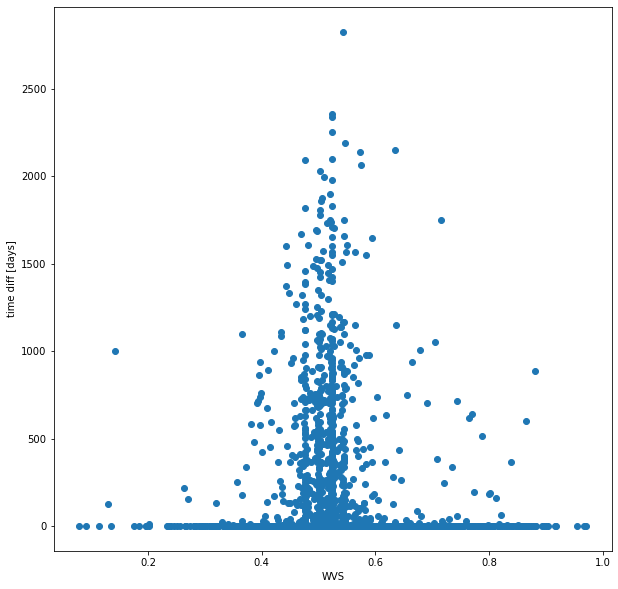

In [52]:
#it's time to plot and see what we have here before we start working on this data
plt.figure(figsize=(10,10))
plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)
plt.xlabel('WVS')
plt.ylabel('time diff [days]')

Looking at the structure of our data we can already suppose that there is no linear relation between the weighted vote score and the 
time that a user lets pass before he updates the review, but let's check that

In [54]:
from scipy import stats
x=tab["weighted_vote_score"]
y=tab["timestamp_diff"]
#Pearson test
correlation = stats.pearsonr(x,y)
print("Pearson's correlation coefficent is:",round(correlation[0],4))

Pearson's correlation coefficent is: 0.0065


Since the coefficent obtained is very low, we can assert that there is no linear correlation between the time that a user lets pass before he updates the review and the weighted vote score.
But there might be a higher degree correlation, we can check that by running some fits on our data

In [55]:
#In this cell we define all the functions we need to run fits on our data
 
from scipy.optimize import curve_fit
from scipy.stats import t
from numpy import exp

def tt(x,n):
    return t.pdf(x,n)
def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def poli(x,a,b,c):
    return a+b*x+c*x*x
def line(x,a,b):
    return a+b*x

In [56]:
#Here we compute the parameters for the fit
param_t, param_cov_t = curve_fit(tt, x, y)
param_g, param_cov_g = curve_fit(gaus,x,y)
param_p, param_cov_p = curve_fit(poli,x,y)
param_l, param_cov_l = curve_fit(line,x,y)

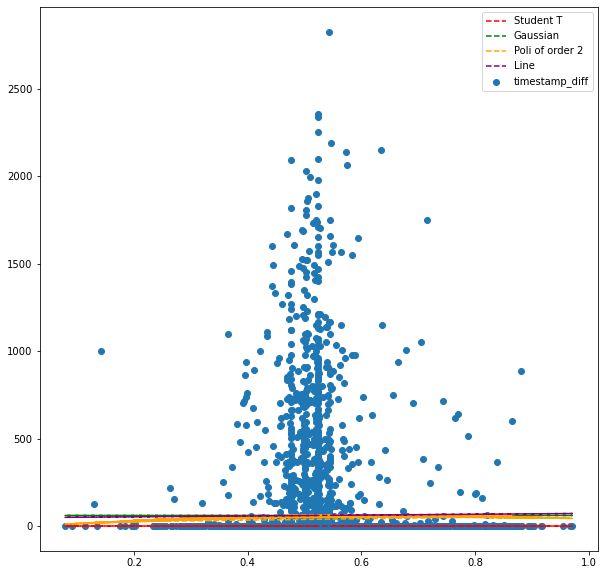

In [57]:
# ans stores the new y-data according to
# the coefficients given by curve-fit() function
plt.figure(figsize=(10,10))

ans_t=t.pdf(x,param_t[0])
plt.plot(x, ans_t, '--', color ='red', label ="Student T")

ans_g=param_g[0]*exp(-(x-param_g[1])**2/(2*param_g[2]**2))
plt.plot(x, ans_g, '--', color ='green', label ="Gaussian")

ans_p=param_p[0]+param_p[1]*x+param_p[2]*x**2
plt.plot(x, ans_p, '--', color ='orange', label ="Poli of order 2")

ans_l=param_l[0]+param_l[1]*x
plt.plot(x, ans_l, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)

plt.legend()
plt.show()

Regardless of the function we use for our fit we are always obtaining very similar results, hence the variables we are taking into consideration are probably not correlated at all: we'll check for the linear correlation using the Pearson test:

## Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [58]:
#let's first split the data in 2 dataframes: one with true values for the recommendation
#and one with false values
tabT = tab[tab.recommended != False]
tabF = tab[tab.recommended == False]

#now let's plot the 2 (sub)dataset we have

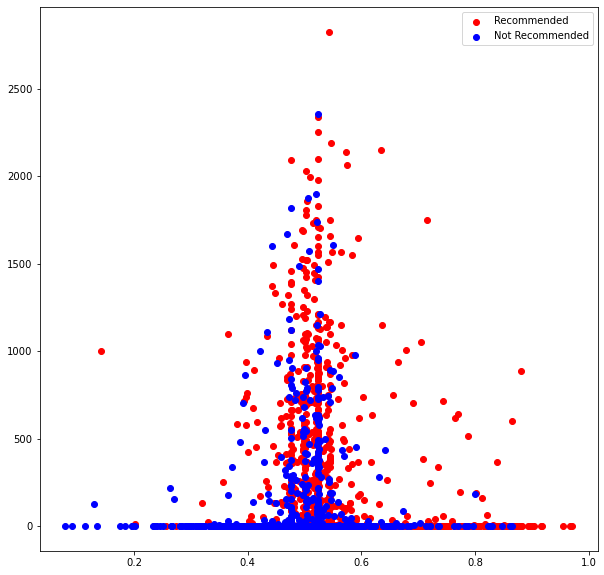

In [59]:
plt.figure(figsize=(10,10))

ax1=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabT, color="red")

ax2=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabF, color="blue")

plt.legend([ax1,ax2],["Recommended","Not Recommended"])
plt.show()

At first sight they still look like before but let's run some test on them before giving a judgement

In [60]:
#as usual, reassigning columns to make the code more readable
xT, yT = tabT['weighted_vote_score'],tabT['timestamp_diff']
xF, yF = tabF['weighted_vote_score'],tabF['timestamp_diff']

#Pearson test
corrT = stats.pearsonr(tabT['weighted_vote_score'],tabT['timestamp_diff'])
corrF = stats.pearsonr(tabF['weighted_vote_score'],tabF['timestamp_diff'])

print("Pearson's correlation coefficent for the Recommended set of data is:",round(corrT[0],4))
print("Pearson's correlation coefficent for the not Recommended set of data is:",round(corrF[0],4))

Pearson's correlation coefficent for the Recommended set of data is: -0.0146
Pearson's correlation coefficent for the not Recommended set of data is: 0.0596


For both cases we still get no linear correlation between the time a user waits to update the review and the weighted vote score

In [61]:
#Run fits to see if we have a higher 
param_tT, param_cov_tT = curve_fit(tt, xT, yT)
param_gT, param_cov_gT = curve_fit(gaus,xT,yT)
param_pT, param_cov_pT = curve_fit(poli,xT,yT)
param_lT, param_cov_lT = curve_fit(line,xT,yT)

param_tF, param_cov_tF = curve_fit(tt, xF, yF)
param_gF, param_cov_gF = curve_fit(gaus,xF,yF)
param_pF, param_cov_pF = curve_fit(poli,xF,yF)
param_lF, param_cov_lF = curve_fit(line,xF,yF)

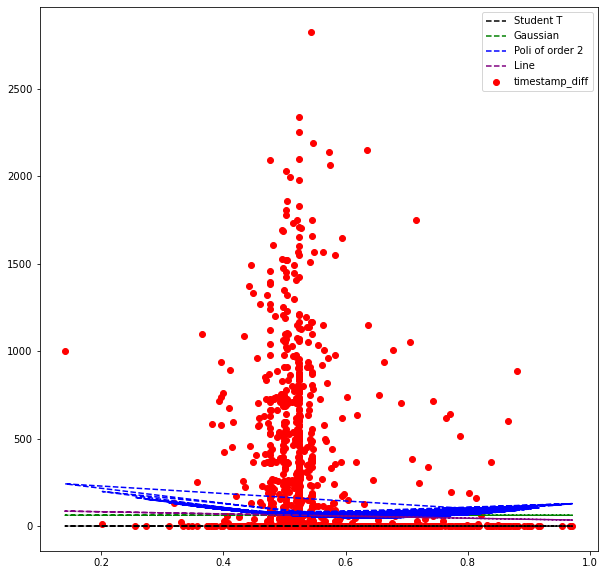

In [62]:
#plot everything
plt.figure(figsize=(10,10))

ans_tT=t.pdf(xT,param_tT[0])
plt.plot(xT, ans_tT, '--', color ='black', label ="Student T")

ans_gT=param_gT[0]*exp(-(xT-param_gT[1])**2/(2*param_gT[2]**2))
plt.plot(xT, ans_gT, '--', color ='green', label ="Gaussian")

ans_pT=param_pT[0]+param_pT[1]*xT+param_pT[2]*xT**2
plt.plot(xT, ans_pT, '--', color ='blue', label ="Poli of order 2")

ans_lT=param_lT[0]+param_lT[1]*xT
plt.plot(xT, ans_lT, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabT, color="red")

#plt.xlim([0,1])
plt.legend()
plt.show()

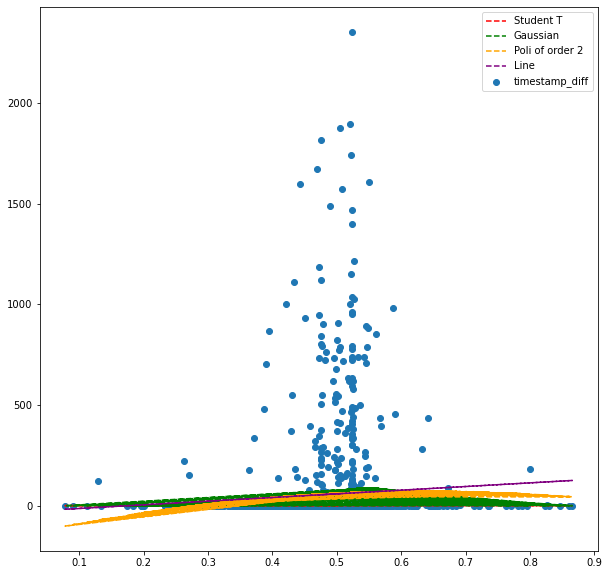

In [63]:
plt.figure(figsize=(10,10))

ans_tF=t.pdf(xF,param_tF[0])
plt.plot(xF, ans_tF, '--', color ='red', label ="Student T")

ans_gF=param_gF[0]*exp(-(xF-param_gF[1])**2/(2*param_gF[2]**2))
plt.plot(xF, ans_gF, '--', color ='green', label ="Gaussian")

ans_pF=param_pF[0]+param_pF[1]*xF+param_pF[2]*xF**2
plt.plot(xF, ans_pF, '--', color ='orange', label ="Poli of order 2")

ans_lF=param_lF[0]+param_lF[1]*xF
plt.plot(xF, ans_lF, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabF)

#plt.xlim([0,1])
plt.legend()
plt.show()

Results show that also in this case (considering wheter the review were recommended or not) there is no real degree of correlation between the 2 variables we are taking into account.

## What are histograms, bar plots, scatterplots and pie charts used for?

Histograms, bar plots, scatterplots and pie charts are tools that are used to explore the dataset and visualize some information about it. In particular:

* **Bar graphs**: are used to display the relationship between a numeric and a categorical variable, its heights or length represent the frequencies of each category. Often we use multiple bar plots to compare different datasets on the same categories;
* **Histograms**: if the groups depicted in a bar graph are actually continuous numeric ranges, we can push the bars together to generate a histogram. As in bar graphs, the bar lengths in histograms typically correspond to counts of data points, and their patterns demonstrate the distribution of variables in your data;
* **Scatterplot**: are used to determine relationships between the two different things. The x-axis is used to measure one event (or variable) and the y-axis is used to measure the other. If both variables increase at the same time, they have a positive relationship. If one variable decreases while the other increases, they have a negative relationship. Sometimes the variables don't follow any pattern and have no relationship;
* **Pie charts**: are best to use when you are trying to compare parts of a whole and you want to highlight the relationship among them.

## What insights can you extract from a Box Plot?


A boxplot is a type of graph used to display patterns of quantitative data. The boxplot splits the data set into quartiles. The body of the boxplot consists of a "box", which goes from the first quartile to the third quartile.

Within the box, an orizzontal line is drawn at the Q2, the median of the data set. Two vertical lines, called whiskers, extend from the bottom and top of the box. The bottom whisker goes from Q1 to the smallest non-outlier in the data set, and the top whisker goes from Q3 to the largest non-outlier.

In the end from a box plot we can extract:
* **min** and **max** value of the data
* **median** of the data
* the **first** and the **third quartile**

In [ ]:
del Russia
del China

# TQ1

**1.**
The algorithm we are given computes
$$alg(A, k) =s \quad \text{such that}\quad \#\{A_i \leq s\} = k$$
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
$$Q(p) = s \quad \text{such that} \quad P(X \leq s) = p$$
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

**2.**
The running time of the algorithm in the worst case scenario is $\Theta(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $\Theta(n)$ (not considering constants).

**3.**
The running time of the algorithm in the best case scenario is $\Theta(1)$: we will be picking the right $s$ right away (at the first try).

# TQ2

## How much running time does it take to execute splitSwap(a, 0, n)?

Given the following recursive function splitSwap, which accepts an array a, an index i, and a length n, let's analyze its computational cost:

>  function splitSwap(a, l, n):<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if n <= 1:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l, n/2)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;splitSwap(a, l+ n /2, n/2)<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;swapList(a, l, n)
    

Before analyzing the computational cost of splitSwap, let’s focus on swapList’s:
>function swapList(a, l, n):<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for i = 0 to n/2:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;tmp = a[l + i]<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + i] = a[l + n/2 + i]<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a[l + n/2 + i] = tmp<br>


* line 1: there is a *for* istance which cost is proportional to the number of iteration,that is, $\theta\big(\frac{n}{2}\big) \approx \theta(n)$
* lines 2-4: there are all constant operations

So the computational cost of swapList is $\theta(n)$.

At this point, since splitSwap is a recursive function, we can write the recurrence equation:

* $T(n)=2\,T\big(\frac{n}{2}\big)+\theta(n)$
* $T(1)=\theta(1)$

Now recalling the master theorem for divide-and-conquer recurrences:
> *Given a recurrence relation $T(n)$ of the form: $$ T(n)=aT\left({\frac {n}{b}}\right)+f(n)$$
>Then the $T(n)$ function is asymptotically limited according to one of the following three cases:* 
>1. if there is a constant $\varepsilon >0$ such that $f(n)=O\left(n^{\log _{b}a-\varepsilon }\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\right)$; 
>2. if $f(n)=\theta \left(n^{\log _{b}a}\right)$ then $T(n)=\theta \left(n^{\log _{b}a}\log n\right)$;
>3. if there is a constant $\varepsilon >0$ such that $f(n)=\Omega \left(n^{\log _{b}a+\varepsilon }\right)$  and exist a constant $0<c<1$ and an integer $n_{0}$ such that $\forall n\geq n_{0}\colon af\left({\frac {n}{b}}\right)\leq cf(n)$, then $T(n)=\theta (f(n))$.

we can state that the computational cost of splitSwap's algorithm is $\theta(n\log(n))$, as we fall into case 2 with $a=2$ and $b=2$.

## What does this algorithm do? Is it optimal?

In order to understand what the splitSwap's algorithm does, let's start analyzing the behaviour of swapList.

Assuming that $0\leq l+ n \leq len(a)$, when we call $\,\texttt{swapList(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and do a permutation with the next $n$'s. In particular we are taking the next $n$ elements, divide them in two subgroups of length $\big\lfloor{\frac{n}{2}}\big\rfloor$ and switch them.

For exemple, given:
* $a = [13,12,3,45,25,6,71,82,99,10]$
* $l = 4$
* $n = 5$

if we want to simulate $\,\texttt{swapList(a,4,5)}\,\,$,we fix the elements $\,\,[13,12,3,45]\,\,$, select the next 5 $\,\,[71,82,25,6,99]\,\,$, divide them in two subgroup of length $\big\lfloor{\frac{5}{2}}\big\rfloor = 2$, $\,\,[71,82] \,\, [25,6] \,\,$ and we switch them. So the result is:

$$a = [13,12,3,45,71,82,25,6,99,10]$$

Now that we’ve figured out what the swapList algorithm does, let’s focus on the previous one. When we call $\,\texttt{splitSwap(a,l,n)}\,$ we are fixing the first $l$ items of the array $a$ and apply recursively the swapList's algorithm to the next $n$ elements. Since we are doing it recursively we are halving each time the array as long as the length of the subarray is greather than 1. At this moment there is a callback of the previous functions and we apply at each subarray created by the callback stack, the swapList's algorithm. Then at the end we get an array with the first $l$ elements unchanged and the next $n$ reversed according to a specific law that depends on the fact if $n$ is even or odd.\
In particular if $n$ is a power of 2 the $n$ elements next to the first $l$'s are reversed according to original order.

For exemple, given:
* $a = [5,2,4,7,1,3,6,8]$
* $l = 3$
* $n = 4$

if we want to simulate $\,\texttt{spliSwap(a,3,4)}$ we can fallow the path show on the next figure:

![spliSwap](splitSwap.png)

# TQ3

In the knapsack problem we are given n objects and each object i has a **weight w_i** and a **value v_i**. We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W that maximized the sum of their values.

Given these heuristics:
    
    -Order them in increasing order of weight and then visit them sequentially, adding them to the solution as long as the
    budget is not exceeded
    
    -Order them in decreasing order of values, and then visit them sequentially, adding them to the solution if the budget
    is not exceeded

    -Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the solution if
    the budget is not exceeded

The goal is to provide for each of these heuristics a counterexample, showing that the solution given is not the optimal one.


We used the same table for the first 2 points and a new one for the last.
We chose to use $n = 7$ elements so that the solution will not be too trivial.
The weight budget, for all 3 counterexamples, will be: $$W_{max} = 10$$ 

##### 1. Increasing order of weight

Given the table:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 3 | 1 |
| 3 | 2 |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |

Aready ordered in increasing order of weight, we see that:
$$W_{1} = 1 + 2 + 3 + 3 = 9 < W_{max}$$
$$V_{1} = 2 + 3 + 1 + 2 = 8 < V_{opt}$$
Where:
$$W_{opt} = 3 + 1 + 2 + 4 = 10 = W_{max}$$
$$V_{opt} = 5 + 2 + 3 + 4 = 14$$

The example show that this method doesn't give the optimal solution.

(Maybe there are other cases better than this, but this is enough to demonstrate that the heuristic doesn't provide the optimal solution)

##### 2. Decreasing order of value

Using the same table of point 1, but ordered properly, we have:

| Weight | Value | 
| :- | -: |
| 3 | 5 |
| 4 | 4 |
| 5 | 3 |
| 2 | 3 |
| 3 | 2 |
| 1 | 2 |
| 3 | 1 |

Keep in consideration that $V_{opt}$ and $W_{opt}$ are the same as before.

Following the heuristic, the solution is:
$$W_{2} = 3 + 4 = 7 < W_{max}$$
$$V_{2} = 5 + 4 = 9 < V_{opt}$$
Again we shown that this is not the optimal solution for this case.

##### 3. Decreasing order of $v_{i}/w_{i}$

Here we have to compute: $$ x_{i} = v_{i} / w_{i}$$
and order the value in the table based on their decreasing order.

Let's calulate the values and build the table:
$$ x_{1} = 5 / 4 = 1.25$$
$$ x_{2} = 3 / 5 = 0.6$$
$$ x_{3} = 3 / 2 = 1.5$$
$$ x_{4} = 2 / 1 = 2$$
$$ x_{5} = 3 / 4 = 0.75$$
$$ x_{6} = 2 / 4 = 0.5$$
$$ x_{7} = 1 / 3 = 0.33$$

As we can see the order is: $$ x_{4}, x_{3}, x_{1}, x_{5}, x_{2}, x_{6}, x_{7} $$


So the table will be:

| Weight | Value | 
| :- | -: |
| 1 | 2 |
| 2 | 3 |
| 4 | 5 |
| 4 | 3 |
| 5 | 3 |
| 4 | 2 |
| 3 | 1 |

Here we see that one of the possible optimal solution is given by: 
$$W_{opt} = 1 + 4 + 2 + 3 = 10 = W_{max} $$
$$V_{opt} = 2 + 5 + 3 + 1 = 11$$
Instead, following the heuristic:
$$W_{3} = 1 + 2 + 4 = 7 < W_{max}$$
$$V_{3} = 2 + 3 + 5 = 10 < V_{opt}$$

We can say that this is a valid counterexample.